In [439]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings("ignore") 
import math

## Load Data

In [ ]:
import pandas as pd
from scipy.spatial import distance
#https://www.google.com/covid19/mobility/
url = 'https://drive.google.com/file/d/18gyHbx6rfogq3yQ-GR9COjcGgyYlCnBZ/view?usp=sharing'
url2020 = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
import pandas as pd
url = 'https://drive.google.com/file/d/1Eg8Lffm49bc-bGFkv_4ddrQw8U8WE6P4/view?usp=sharing'
url2021 = 'https://drive.google.com/uc?id=' + url.split('/')[-2]

In [ ]:
df20 = pd.read_csv(url2020)
df21 = pd.read_csv(url2021)

**retail_and_recreation_percent_change_from_baseline**

Mobility trends for places like restaurants, cafes, shopping centers, theme parks, museums, libraries, and movie theaters.

**grocery_and_pharmacy_percent_change_from_baseline**

Mobility trends for places like grocery markets, food warehouses, farmers markets, specialty food shops, drug stores, and pharmacies.

**parks_percent_change_from_baseline**

Mobility trends for places like local parks, national parks, public beaches, marinas, dog parks, plazas, and public gardens.

**transit_stations_percent_change_from_baseline**

Mobility trends for places like public transport hubs such as subway, bus, and train stations.

**workplaces_percent_change_from_baseline**

Mobility trends for places of work.


In [ ]:
len(df20.place_id.unique())

584

In [42]:
#df20.info()
#df21.info()

In [44]:
frames = [df20, df21]
g_mob=pd.concat(frames)
g_mob.index=range(0,len(g_mob))
#g_mob.info()

In [45]:
#g_mob.head()

In [46]:
g_mob=g_mob[["date",
             "retail_and_recreation_percent_change_from_baseline",
             "grocery_and_pharmacy_percent_change_from_baseline",
             "parks_percent_change_from_baseline",
             "transit_stations_percent_change_from_baseline",
             "workplaces_percent_change_from_baseline"]]
g_mob.rename(columns={
             "date":"date",
             "retail_and_recreation_percent_change_from_baseline":"restaurants_cafes" ,
             "grocery_and_pharmacy_percent_change_from_baseline":"grocery_pharmacies" ,
             "parks_percent_change_from_baseline":"parks" ,
             "transit_stations_percent_change_from_baseline":"subway_train" ,
             "workplaces_percent_change_from_baseline":"workplaces" 
}, 
             inplace=True);

In [48]:
#g_mob.info()

#### Biraz inceledikten sonra bazı veri ön işleme adımlarını gerçekleştirmemiz gerektiği görüldü
- Bazı columnlarda fazla sayıda eksik değer var. Bu eksik değerleri doldurmalıyız.  
- __"Date"__ değişkeni ayırıp, gün, ay, hafta şeklinde 3 sütun daha eklemek bizim için faydalı olacak.
- Tarihlere göre mobility değişimini hakkında bir içgörü kazanmak adına verileri görselleştireceğiz. Bununla birlikte, bu görselleştirmeye "covid ölümleri" ni de dahil edersek faydalı lacak. O yüzden Covid- ölüm datasını bu dataya ekleyeceğiz. Şu anlık bunları yapıp devam edeceğiz. 


__Eksik gözlem analizi__  

In [49]:
#!pip install ycimpute
from ycimpute.imputer import knnimput
names=list(g_mob)
nparray_df=np.array(g_mob.iloc[:, 1:])
nparray_df.shape

(326087, 5)

In [50]:
features_to_fill=["restaurants_cafes","grocery_pharmacies","parks","subway_train","workplaces"]
filled_df_array=np.zeros(nparray_df.shape)
curr=0
row_size_of_g_mob=g_mob.shape[0]
for i in np.arange(10000, row_size_of_g_mob,10000):
    if(np.any(np.isnan(nparray_df[curr:i][:]))):
        filled_df_array[curr:i]=knnimput.KNN(k = 37).complete(nparray_df[curr:i][:]);
    curr=i

if(np.any(np.isnan(nparray_df[curr:][:]))):
    filled_df_array[curr:]=knnimput.KNN(k = 37).complete(nparray_df[curr:row_size_of_g_mob][:]);

Imputing row 1/10000 with 0 missing, elapsed time: 9.311
Imputing row 101/10000 with 0 missing, elapsed time: 9.311
Imputing row 201/10000 with 0 missing, elapsed time: 9.311
Imputing row 301/10000 with 0 missing, elapsed time: 9.311
Imputing row 401/10000 with 0 missing, elapsed time: 9.311
Imputing row 501/10000 with 0 missing, elapsed time: 9.311
Imputing row 601/10000 with 0 missing, elapsed time: 9.311
Imputing row 701/10000 with 0 missing, elapsed time: 9.311
Imputing row 801/10000 with 0 missing, elapsed time: 9.311
Imputing row 901/10000 with 0 missing, elapsed time: 9.311
Imputing row 1001/10000 with 0 missing, elapsed time: 9.311
Imputing row 1101/10000 with 0 missing, elapsed time: 9.311
Imputing row 1201/10000 with 0 missing, elapsed time: 9.311
Imputing row 1301/10000 with 1 missing, elapsed time: 9.311
Imputing row 1401/10000 with 1 missing, elapsed time: 9.326
Imputing row 1501/10000 with 2 missing, elapsed time: 9.326
Imputing row 1601/10000 with 4 missing, elapsed time

In [51]:
g_mob_filled=g_mob.copy()
print(g_mob_filled.isnull().values.any())
g_mob_filled.iloc[:][features_to_fill]=filled_df_array
print(g_mob_filled.isnull().values.any())
g_mob_filled=g_mob_filled.groupby(by="date").sum()

True
False


In [53]:
g_mob_filled.isnull().sum()

restaurants_cafes     0
grocery_pharmacies    0
parks                 0
subway_train          0
workplaces            0
dtype: int64

In [54]:
#g_mob_filled.hist(bins=50, figsize=(20,15))
#plt.show()

# T.C sağlık bakanlığı web sitesinden çekilen corona virüsü-vaka grafiğinin dataFrame'e eklenmesi:

In [536]:
import pandas as pd
covid_tr_data = pd.read_html('htmldeneme.html', encoding="utf-8")[0]
covid_tr_data=covid_tr_data[["Tarih", "Bugünkü Vaka Sayısı", "Bugünkü Hasta Sayısı", "Bugünkü Vefat Sayısı","Bugünkü İyileşen Sayısı" ]]
covid_tr_data.columns=[ "date", "daily_case","daily_patient", "daily_death", "daily_recovered"]

def date_set(date):
    splitted_date=date.split()
    mouth_number={
        'OCAK':"01",
        'ŞUBAT':"02",
        'MART':"03",
        'NİSAN':"04",
        'MAYIS':"05",
        'HAZİRAN':"06",
        'TEMMUZ':"07",
        'AĞUSTOS':"08",
        'EYLÜL':"09",
        'EKİM':"10",
        'KASIM':"11",
        'ARALIK':"12"
    }
    for mouth_name, mouth_no in mouth_number.items():
        if(splitted_date[1]==mouth_name):
            splitted_date[1]=mouth_no
            to_convert_datatime=splitted_date[2]+"-"+splitted_date[1]+"-"+splitted_date[0]
            return pd.to_datetime(to_convert_datatime)     
covid_tr_data["date"]=covid_tr_data["date"].apply(lambda x: date_set(x))
covid_tr_data=covid_tr_data[covid_tr_data.isnull().sum(axis=1)<3]
covid_tr_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 638 entries, 0 to 637
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             638 non-null    datetime64[ns]
 1   daily_case       395 non-null    float64       
 2   daily_patient    465 non-null    float64       
 3   daily_death      638 non-null    float64       
 4   daily_recovered  630 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 29.9 KB


In [537]:
#covid_tr_data.head()

__Veride hasta sayısı binaltıyüz:1.600(1.6 olarak algılanacak şekilde, yüzelli: 150(yüzelli olarak algılanacak şekilde girilmiş. Bunun düzenleme:__

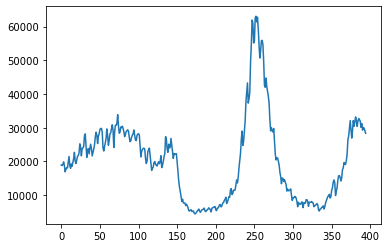

In [538]:
features_to_fix=["daily_case","daily_patient", "daily_death", "daily_recovered"]
#covid_tr_data[features_to_fix]=
covid_tr_data[features_to_fix]=covid_tr_data[features_to_fix].apply(lambda x :  x.apply(lambda k: k if( (k%1==0)) else(k*1000)))
plt.plot(covid_tr_data.daily_case)

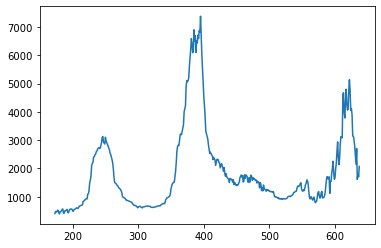

In [539]:
plt.plot(covid_tr_data.daily_patient)

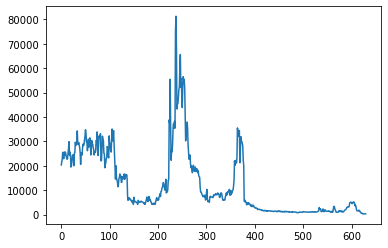

In [540]:
plt.plot(covid_tr_data.daily_recovered)

__Eksik gözlem analizi__

In [541]:
names=list(covid_tr_data)
nparray_covid_df=np.array(covid_tr_data.loc[:, ["daily_case","daily_patient","daily_death"]])
covid_filled_arr=knnimput.KNN(k = 10).complete(nparray_covid_df)
covid_filled=covid_tr_data.copy()
covid_filled.loc[:, ["daily_case","daily_patient","daily_death"]]=covid_filled_arr
print(covid_filled.isnull().values.any())
covid_filled=covid_filled.groupby(by="date").sum()

Imputing row 1/638 with 1 missing, elapsed time: 0.037
Imputing row 101/638 with 1 missing, elapsed time: 0.039
Imputing row 201/638 with 0 missing, elapsed time: 0.040
Imputing row 301/638 with 0 missing, elapsed time: 0.040
Imputing row 401/638 with 1 missing, elapsed time: 0.041
Imputing row 501/638 with 1 missing, elapsed time: 0.042
Imputing row 601/638 with 1 missing, elapsed time: 0.044
True


In [542]:
#covid_filled.daily_case=(covid_filled.daily_case*1000).astype("int32")
#covid_filled.daily_recovered=(covid_filled.daily_recovered*1000).astype("int32")

In [544]:
g_mob_filled=g_mob.copy()
print(g_mob_filled.isnull().values.any())
g_mob_filled.iloc[:][features_to_fill]=filled_df_array
print(g_mob_filled.isnull().values.any())
g_mob_filled=g_mob_filled.groupby(by="date").sum()

True
False


1.2

In [546]:
covid_filled["date"]=covid_filled.index
covid_filled.index=range(0,covid_filled.shape[0])
g_mob_filled["date"]=g_mob_filled.index
g_mob_filled.index=range(0,g_mob_filled.shape[0])
g_mob_filled['date'] = pd.to_datetime(g_mob_filled.date)
mobility_death_data=pd.merge(covid_filled, g_mob_filled, on="date")

In [547]:
mobility_death_data

,daily_case,daily_patient,daily_death,daily_recovered,date,restaurants_cafes,grocery_pharmacies,parks,subway_train,workplaces
0,6196.702348,2069.000000,17.0,0.0,2020-03-27,-26645.312332,-9622.375998,-15857.788358,-26884.140990,-20427.388989
1,6206.281869,1704.000000,16.0,0.0,2020-03-28,-27669.443447,-11632.327767,-19986.634598,-26354.203539,-17606.438216
2,6120.467640,1815.000000,23.0,0.0,2020-03-29,-30917.179758,-16447.601995,-23384.608234,-29536.722489,-19566.545250
3,5481.189405,1610.000000,37.0,0.0,2020-03-30,-26823.959738,-10711.872147,-16020.916196,-28046.097606,-21483.998857
4,7500.946217,2704.000000,46.0,0.0,2020-03-31,-27737.959163,-12100.783698,-18257.049514,-28612.736818,-22114.873479
...,...,...,...,...,...,...,...,...,...,...
553,28873.000000,5725.116058,210.0,26224.0,2021-10-01,13599.311563,38460.117817,25136.169431,13541.856304,1866.186973
554,27973.000000,5966.112388,203.0,22110.0,2021-10-02,11424.570845,31192.776943,22179.336188,11675.469533,576.967730
555,27351.000000,6335.576422,194.0,22004.0,2021-10-03,8180.045260,24505.972443,21832.056046,8661.288803,-1301.014152
556,28810.000000,4698.509257,248.0,33152.0,2021-10-04,14525.437745,37456.864152,25998.773930,13250.966359,1437.494070


In [549]:
mobility_death_data.head()

,daily_case,daily_patient,daily_death,daily_recovered,date,restaurants_cafes,grocery_pharmacies,parks,subway_train,workplaces
0,6196.702348,2069.0,17.0,0.0,2020-03-27,-26645.312332,-9622.375998,-15857.788358,-26884.140990,-20427.388989
1,6206.281869,1704.0,16.0,0.0,2020-03-28,-27669.443447,-11632.327767,-19986.634598,-26354.203539,-17606.438216
2,6120.467640,1815.0,23.0,0.0,2020-03-29,-30917.179758,-16447.601995,-23384.608234,-29536.722489,-19566.545250
3,5481.189405,1610.0,37.0,0.0,2020-03-30,-26823.959738,-10711.872147,-16020.916196,-28046.097606,-21483.998857
4,7500.946217,2704.0,46.0,0.0,2020-03-31,-27737.959163,-12100.783698,-18257.049514,-28612.736818,-22114.873479


In [550]:
mobility_death_data=mobility_death_data.groupby([pd.Grouper(key='date', freq='W-MON')]).mean().reset_index()

In [551]:
mobility_death_data["week"]=mobility_death_data.index

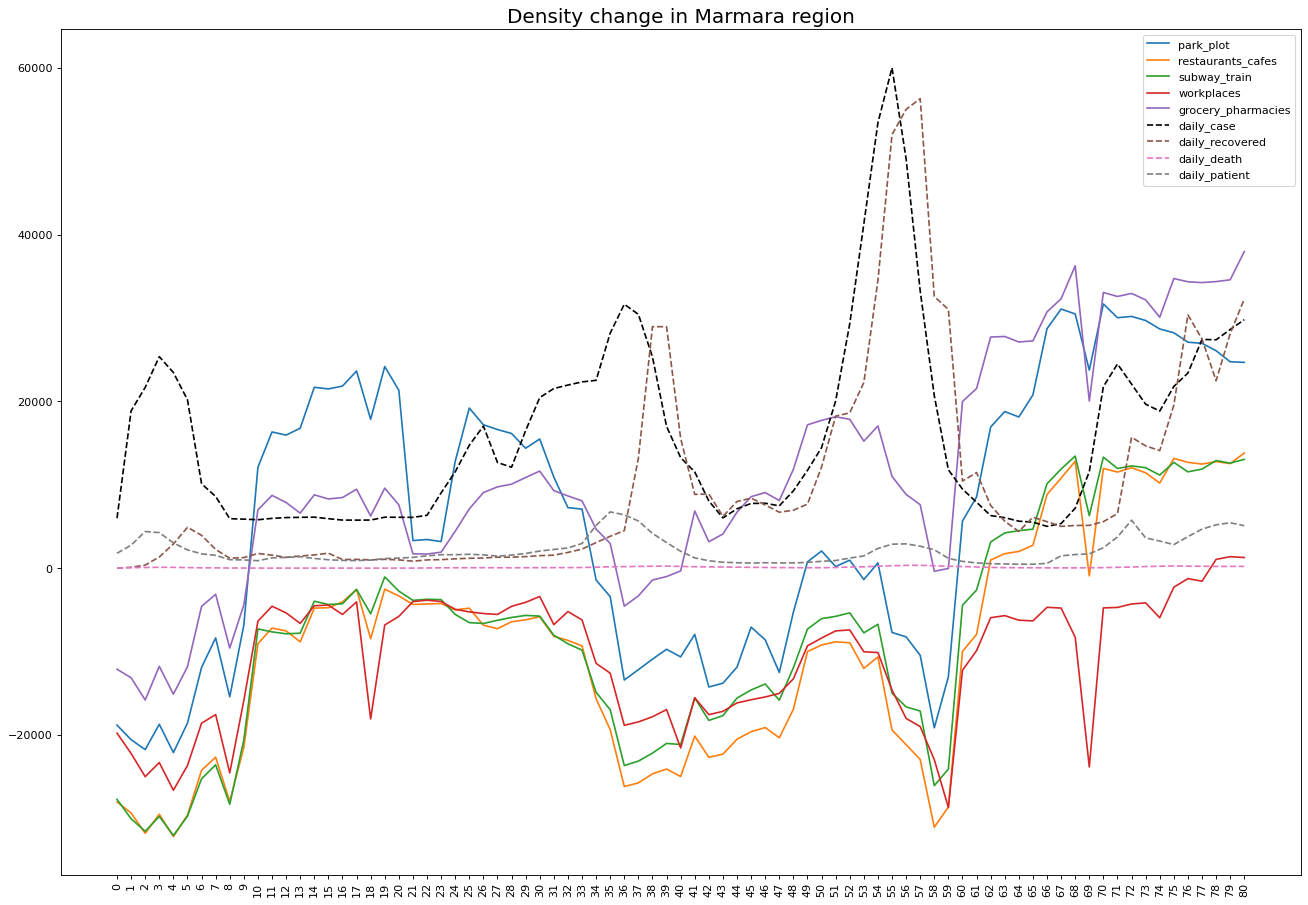

In [562]:
plt.figure(figsize=(20,14), dpi=80)
X = mobility_death_data.week # datanın indexi direkt month olduğu için
parks_plot = plt.plot(X,mobility_death_data.parks)
restaurants_cafes = plt.plot(X,mobility_death_data.restaurants_cafes)
subway_train = plt.plot(X,mobility_death_data.subway_train)
workplaces = plt.plot(X,mobility_death_data.workplaces)
grocery_pharmacies = plt.plot(X,mobility_death_data.grocery_pharmacies)
daily_case = plt.plot(X,mobility_death_data.daily_case, "--", color="#000000")
daily_recovered = plt.plot(X,mobility_death_data.daily_recovered, "--")
daily_death = plt.plot(X,mobility_death_data.daily_death, "--")
daily_patient = plt.plot(X,mobility_death_data.daily_patient, "--")


plt.title('Density change in Marmara region', fontsize=18)
plt.xticks(rotation=90)
plt.xticks(X)
# Modify legend
plt.legend([ parks_plot[0], restaurants_cafes[0], subway_train[0], workplaces[0], grocery_pharmacies[0], daily_case[0], daily_recovered[0], daily_death[0], daily_patient[0]],
           [ 'park_plot', 'restaurants_cafes', 'subway_train', 'workplaces', 'grocery_pharmacies', 'daily_case', 'daily_recovered', 'daily_death', "daily_patient"]) 
plt.show()

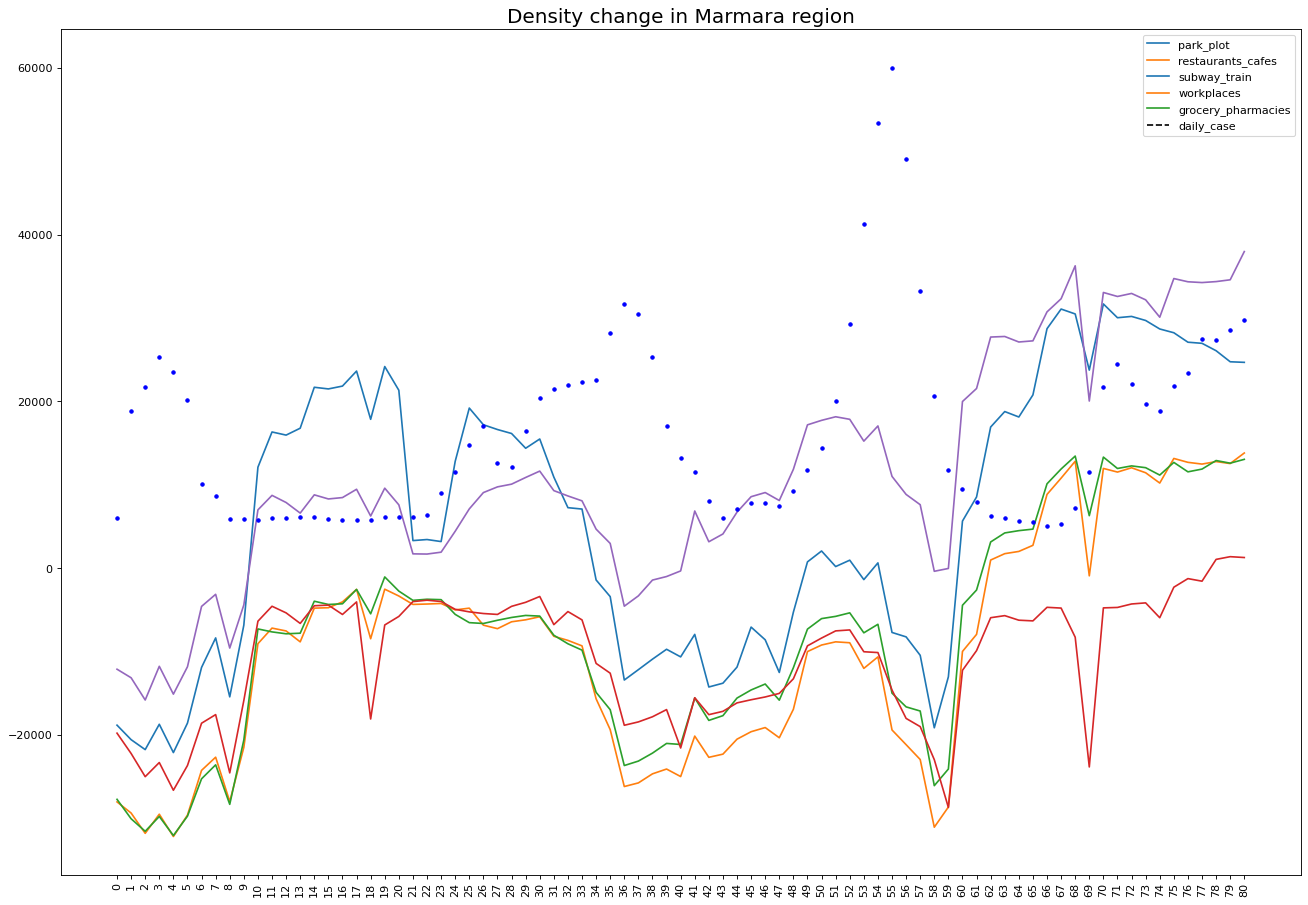

In [567]:
plt.figure(figsize=(20,14), dpi=80)
X = mobility_death_data.week # datanın indexi direkt month olduğu için
parks_plot = plt.plot(X,mobility_death_data.parks, 
                      X,mobility_death_data.restaurants_cafes,
                      X,mobility_death_data.subway_train,
                      X,mobility_death_data.workplaces,
                      X,mobility_death_data.grocery_pharmacies,
                      X,mobility_death_data.daily_case, "b.")



plt.title('Density change in Marmara region', fontsize=18)
plt.xticks(rotation=90)
plt.xticks(X)
# Modify legend
plt.legend([ parks_plot[0], restaurants_cafes[0], subway_train[0], workplaces[0], grocery_pharmacies[0], daily_case[0]],
           [ 'park_plot', 'restaurants_cafes', 'subway_train', 'workplaces', 'grocery_pharmacies', 'daily_case']) 
plt.show()